In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/data sets/TimeSeriesAnalysis/daily-website-visitors.csv')

In [ ]:
df.head()

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Row                2167 non-null   int64 
 1   Day                2167 non-null   object
 2   Day.Of.Week        2167 non-null   int64 
 3   Date               2167 non-null   object
 4   Page.Loads         2167 non-null   object
 5   Unique.Visits      2167 non-null   object
 6   First.Time.Visits  2167 non-null   object
 7   Returning.Visits   2167 non-null   object
dtypes: int64(2), object(6)
memory usage: 135.6+ KB


In [ ]:
df.shape

(2167, 8)

In [ ]:
df.isnull().sum()

,0
Row,0
Day,0
Day.Of.Week,0
Date,0
Page.Loads,0
Unique.Visits,0
First.Time.Visits,0
Returning.Visits,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df.columns

Index(['Row', 'Day', 'Day.Of.Week', 'Date', 'Page.Loads', 'Unique.Visits',
       'First.Time.Visits', 'Returning.Visits'],
      dtype='object')

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
model=LabelEncoder()

columnn=['Day','Page.Loads', 'Unique.Visits',
       'First.Time.Visits', 'Returning.Visits']
for i in columnn:
  df[i]=model.fit_transform(df[i])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Row                2167 non-null   int64         
 1   Day                2167 non-null   int64         
 2   Day.Of.Week        2167 non-null   int64         
 3   Date               2167 non-null   datetime64[ns]
 4   Page.Loads         2167 non-null   int64         
 5   Unique.Visits      2167 non-null   int64         
 6   First.Time.Visits  2167 non-null   int64         
 7   Returning.Visits   2167 non-null   int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 135.6 KB


In [ ]:
df=df.sort_index()

In [ ]:
duplicates=df.index.duplicated().sum()
print(f'duplicate dates:{duplicates}')

duplicate dates:0


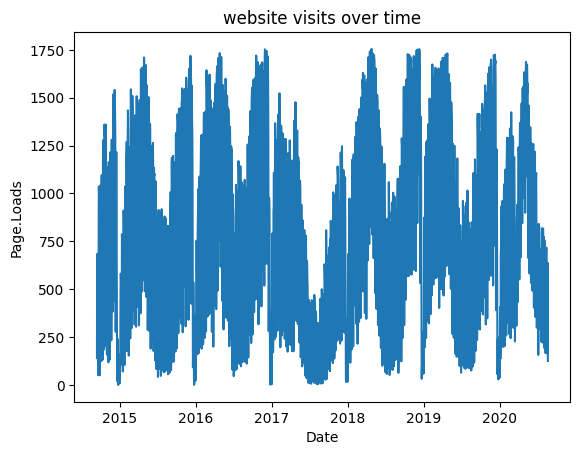

In [ ]:
sns.lineplot(data=df,x='Date',y='Page.Loads')
plt.title('website visits over time')
plt.show()

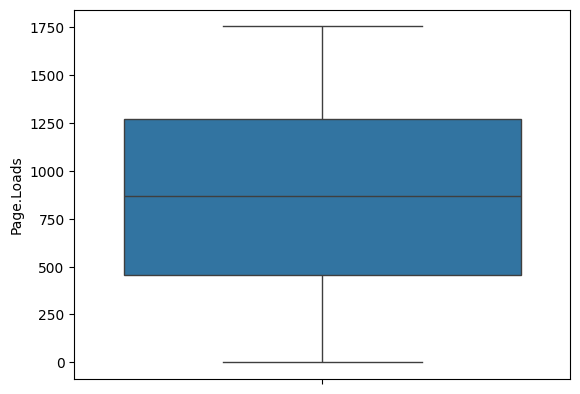

In [ ]:
sns.boxplot(df['Page.Loads'])
plt.show()

In [ ]:
df.columns

Index(['Row', 'Day', 'Day.Of.Week', 'Date', 'Page.Loads', 'Unique.Visits',
       'First.Time.Visits', 'Returning.Visits'],
      dtype='object')

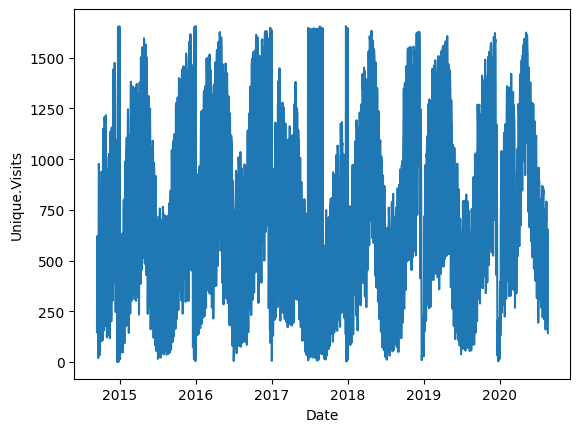

In [ ]:
sns.lineplot(data=df,x='Date',y='Unique.Visits')
plt.show()

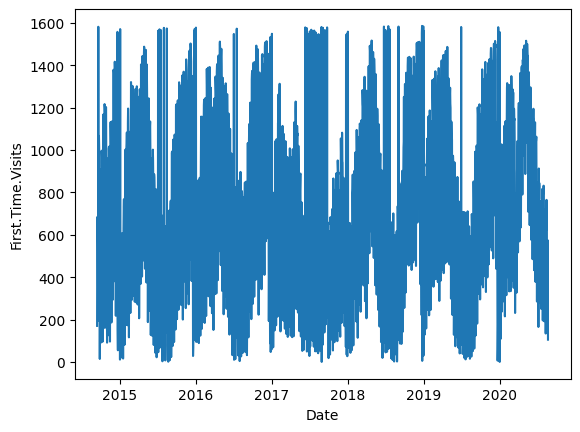

In [ ]:
sns.lineplot(data=df,x='Date',y='First.Time.Visits')
plt.show()

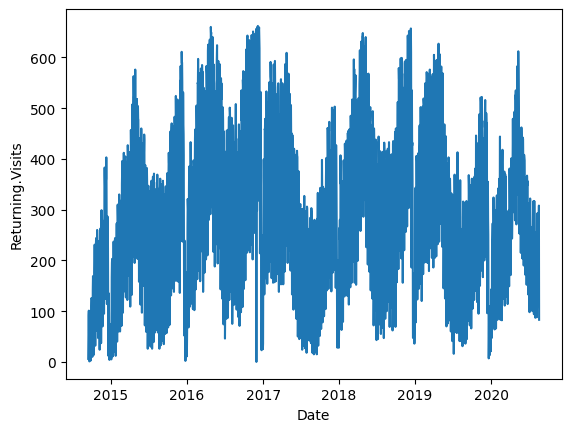

In [ ]:

sns.lineplot(data=df,x='Date',y='Returning.Visits')
plt.show()

In [ ]:
q1=df['Page.Loads'].quantile(0.25)
q3=df['Page.Loads'].quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
df=df[(df['Page.Loads']>=lower)& (df['Page.Loads']<=upper)]
df.shape

(2167, 8)

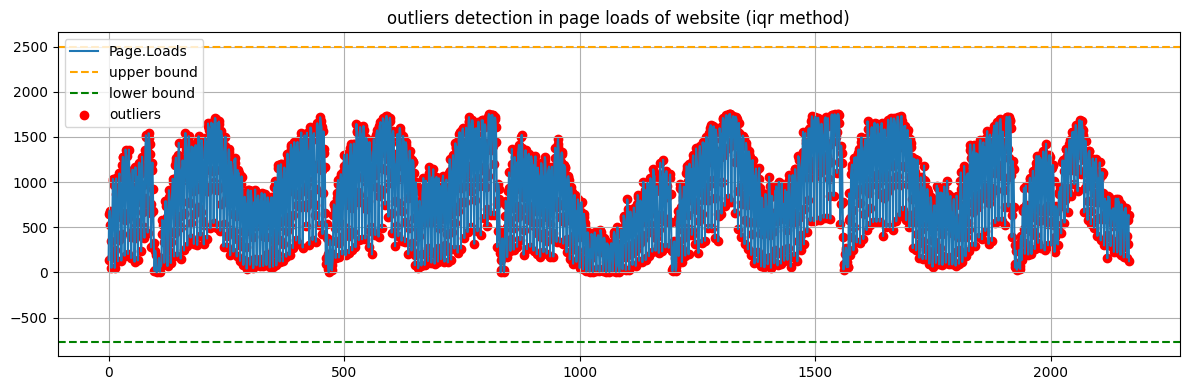

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(df['Page.Loads'],label='Page.Loads')
plt.axhline(upper,color='orange',linestyle='--',label='upper bound')
plt.axhline(lower,color='green',linestyle='--',label='lower bound')
plt.scatter(df.index,filtered_data['Page.Loads'],color='red',label='outliers')
plt.title('outliers detection in page loads of website (iqr method)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
result=adfuller(df['Page.Loads'])
print('ADF Statstic:',result[0])
print('p-value:',result[1])

ADF Statstic: -4.850400576382536
p-value: 4.351534585448671e-05


In [ ]:
df['Page.Loads_diff']=df['Page.Loads'].diff()

In [ ]:
df.head()

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits,Page.Loads_diff
0,1,3,1,2014-09-14,140,147,170,6,NaN
1,2,1,2,2014-09-15,652,566,651,51,512.0
2,3,5,3,2014-09-16,685,621,685,92,33.0
3,4,6,4,2014-09-17,672,608,670,101,-13.0
4,5,4,5,2014-09-18,526,488,537,56,-146.0


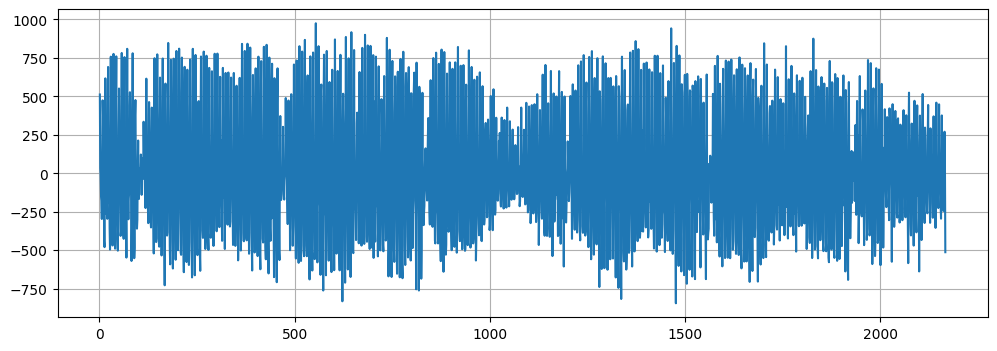

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(df['Page.Loads_diff'],label='Differenced Series')
plt.grid(True)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(df['Page.Loads_diff'],order=(1,1,1))
fit=model.fit()
print(fit.summary())

                               SARIMAX Results                                
Dep. Variable:        Page.Loads_diff   No. Observations:                 2167
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -15748.873
Date:                Tue, 05 Aug 2025   AIC                          31503.747
Time:                        07:17:37   BIC                          31520.788
Sample:                             0   HQIC                         31509.979
                               - 2167                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2682      0.022     12.363      0.000       0.226       0.311
ma.L1         -1.0000      0.536     -1.865      0.062      -2.051       0.051
sigma2      1.206e+05   6.57e+04      1.837      0.0

In [ ]:
forecast=fit.get_forecast(steps=200)
mean_forecast=forecast.predicted_mean
conf_int=forecast.conf_int()

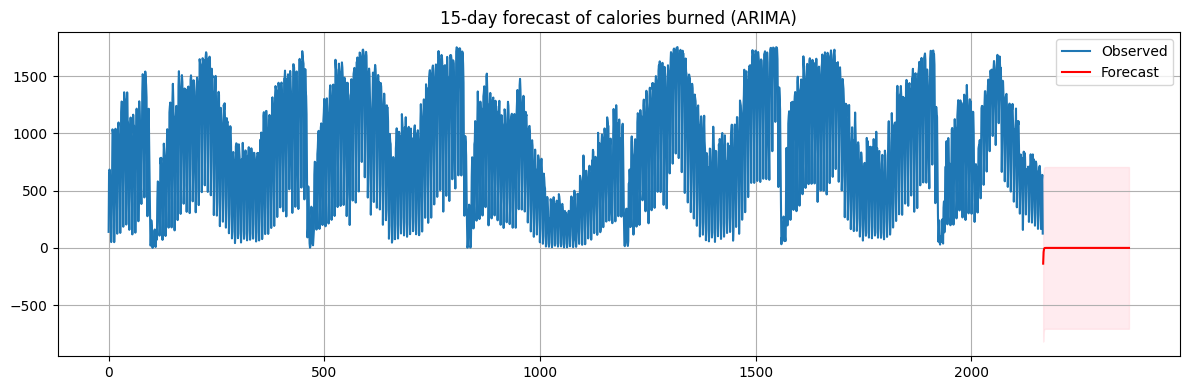

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(df['Page.Loads'],label='Observed')
plt.plot(mean_forecast.index,mean_forecast,color='red',label='Forecast')
plt.fill_between(mean_forecast.index,
                 conf_int.iloc[:,0].astype(float),
                 conf_int.iloc[:,1].astype(float),
                 color='pink',alpha=0.3)
plt.title('15-day forecast of calories burned (ARIMA)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df.head()

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits,Page.Loads_diff
0,1,3,1,2014-09-14,140,147,170,6,NaN
1,2,1,2,2014-09-15,652,566,651,51,512.0
2,3,5,3,2014-09-16,685,621,685,92,33.0
3,4,6,4,2014-09-17,672,608,670,101,-13.0
4,5,4,5,2014-09-18,526,488,537,56,-146.0


In [ ]:
dff = df.rename(columns={"Date": "ds", "Page.Loads": "y"})

In [ ]:
dff.head()

,Row,Day,Day.Of.Week,ds,y,Unique.Visits,First.Time.Visits,Returning.Visits,Page.Loads_diff
0,1,3,1,2014-09-14,140,147,170,6,NaN
1,2,1,2,2014-09-15,652,566,651,51,512.0
2,3,5,3,2014-09-16,685,621,685,92,33.0
3,4,6,4,2014-09-17,672,608,670,101,-13.0
4,5,4,5,2014-09-18,526,488,537,56,-146.0


In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly,plot_components_plotly
import plotly.express as px
import plotly.graph_objects as go


In [ ]:
model=Prophet()
model.fit(dff)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg91_hxro/k6m4hpte.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg91_hxro/s0uydh7d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77763', 'data', 'file=/tmp/tmpg91_hxro/k6m4hpte.json', 'init=/tmp/tmpg91_hxro/s0uydh7d.json', 'output', 'file=/tmp/tmpg91_hxro/prophet_modelyls5zneh/prophet_model-20250805071738.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecasts=model.make_future_dataframe(periods=730)
predictions=model.predict(forecasts)
fig=plot_plotly(model,predictions)
fig.show()